# `ARITIFICAIL NEURAL NETWORK`

`From Biological to Artificial Neurons`

They were first
introduced back in 1943 by the neurophysiologist Warren McCulloch and
the mathematician Walter Pitts. In their landmark paper “A Logical
Calculus of Ideas Immanent in Nervous Activity”, McCulloch and Pitts
presented a simplified computational model of how biological neurons
might work together in animal brains to perform complex computations
using propositional logic. This was the first artificial neural network
architecture. Since then many other architectures have been invented, as
you will see.


Need for ANN

- There is now a huge quantity of data available to train neural networks,
and ANNs frequently outperform other ML techniques on very large
and complex problem

- The tremendous increase in computing power since the 1990s now
makes it possible to train large neural networks in a reasonable amount
of time. This is in part due to Moore’s law (the number of components
in integrated circuits has doubled about every 2 years over the last 50
years), but also thanks to the gaming industry, which has stimulated
the production of powerful GPU cards by the mill

- The training algorithms have been improved. To be fair they are only
slightly different from the ones used in the 1990s, but these relatively
small tweaks have had a huge positive impac

- Some theoretical limitations of ANNs have turned out to be benign in
practice. For example, many people thought that ANN training
algorithms were doomed because they were likely to get stuck in local
optima, but it turns out that this is not a big problem in practice,
especially for larger neural networks: the local optima often perform
almost as well as the global op

- Some theoretical limitations of ANNs have turned out to be benign in
practice. For example, many people thought that ANN training
algorithms were doomed because they were likely to get stuck in local
optima, but it turns out that this is not a big problem in practice,
especially for larger neural networks: the local optima often perform
almost as well as the global optimumtimumt.ions.s.

# Concept of Neuron

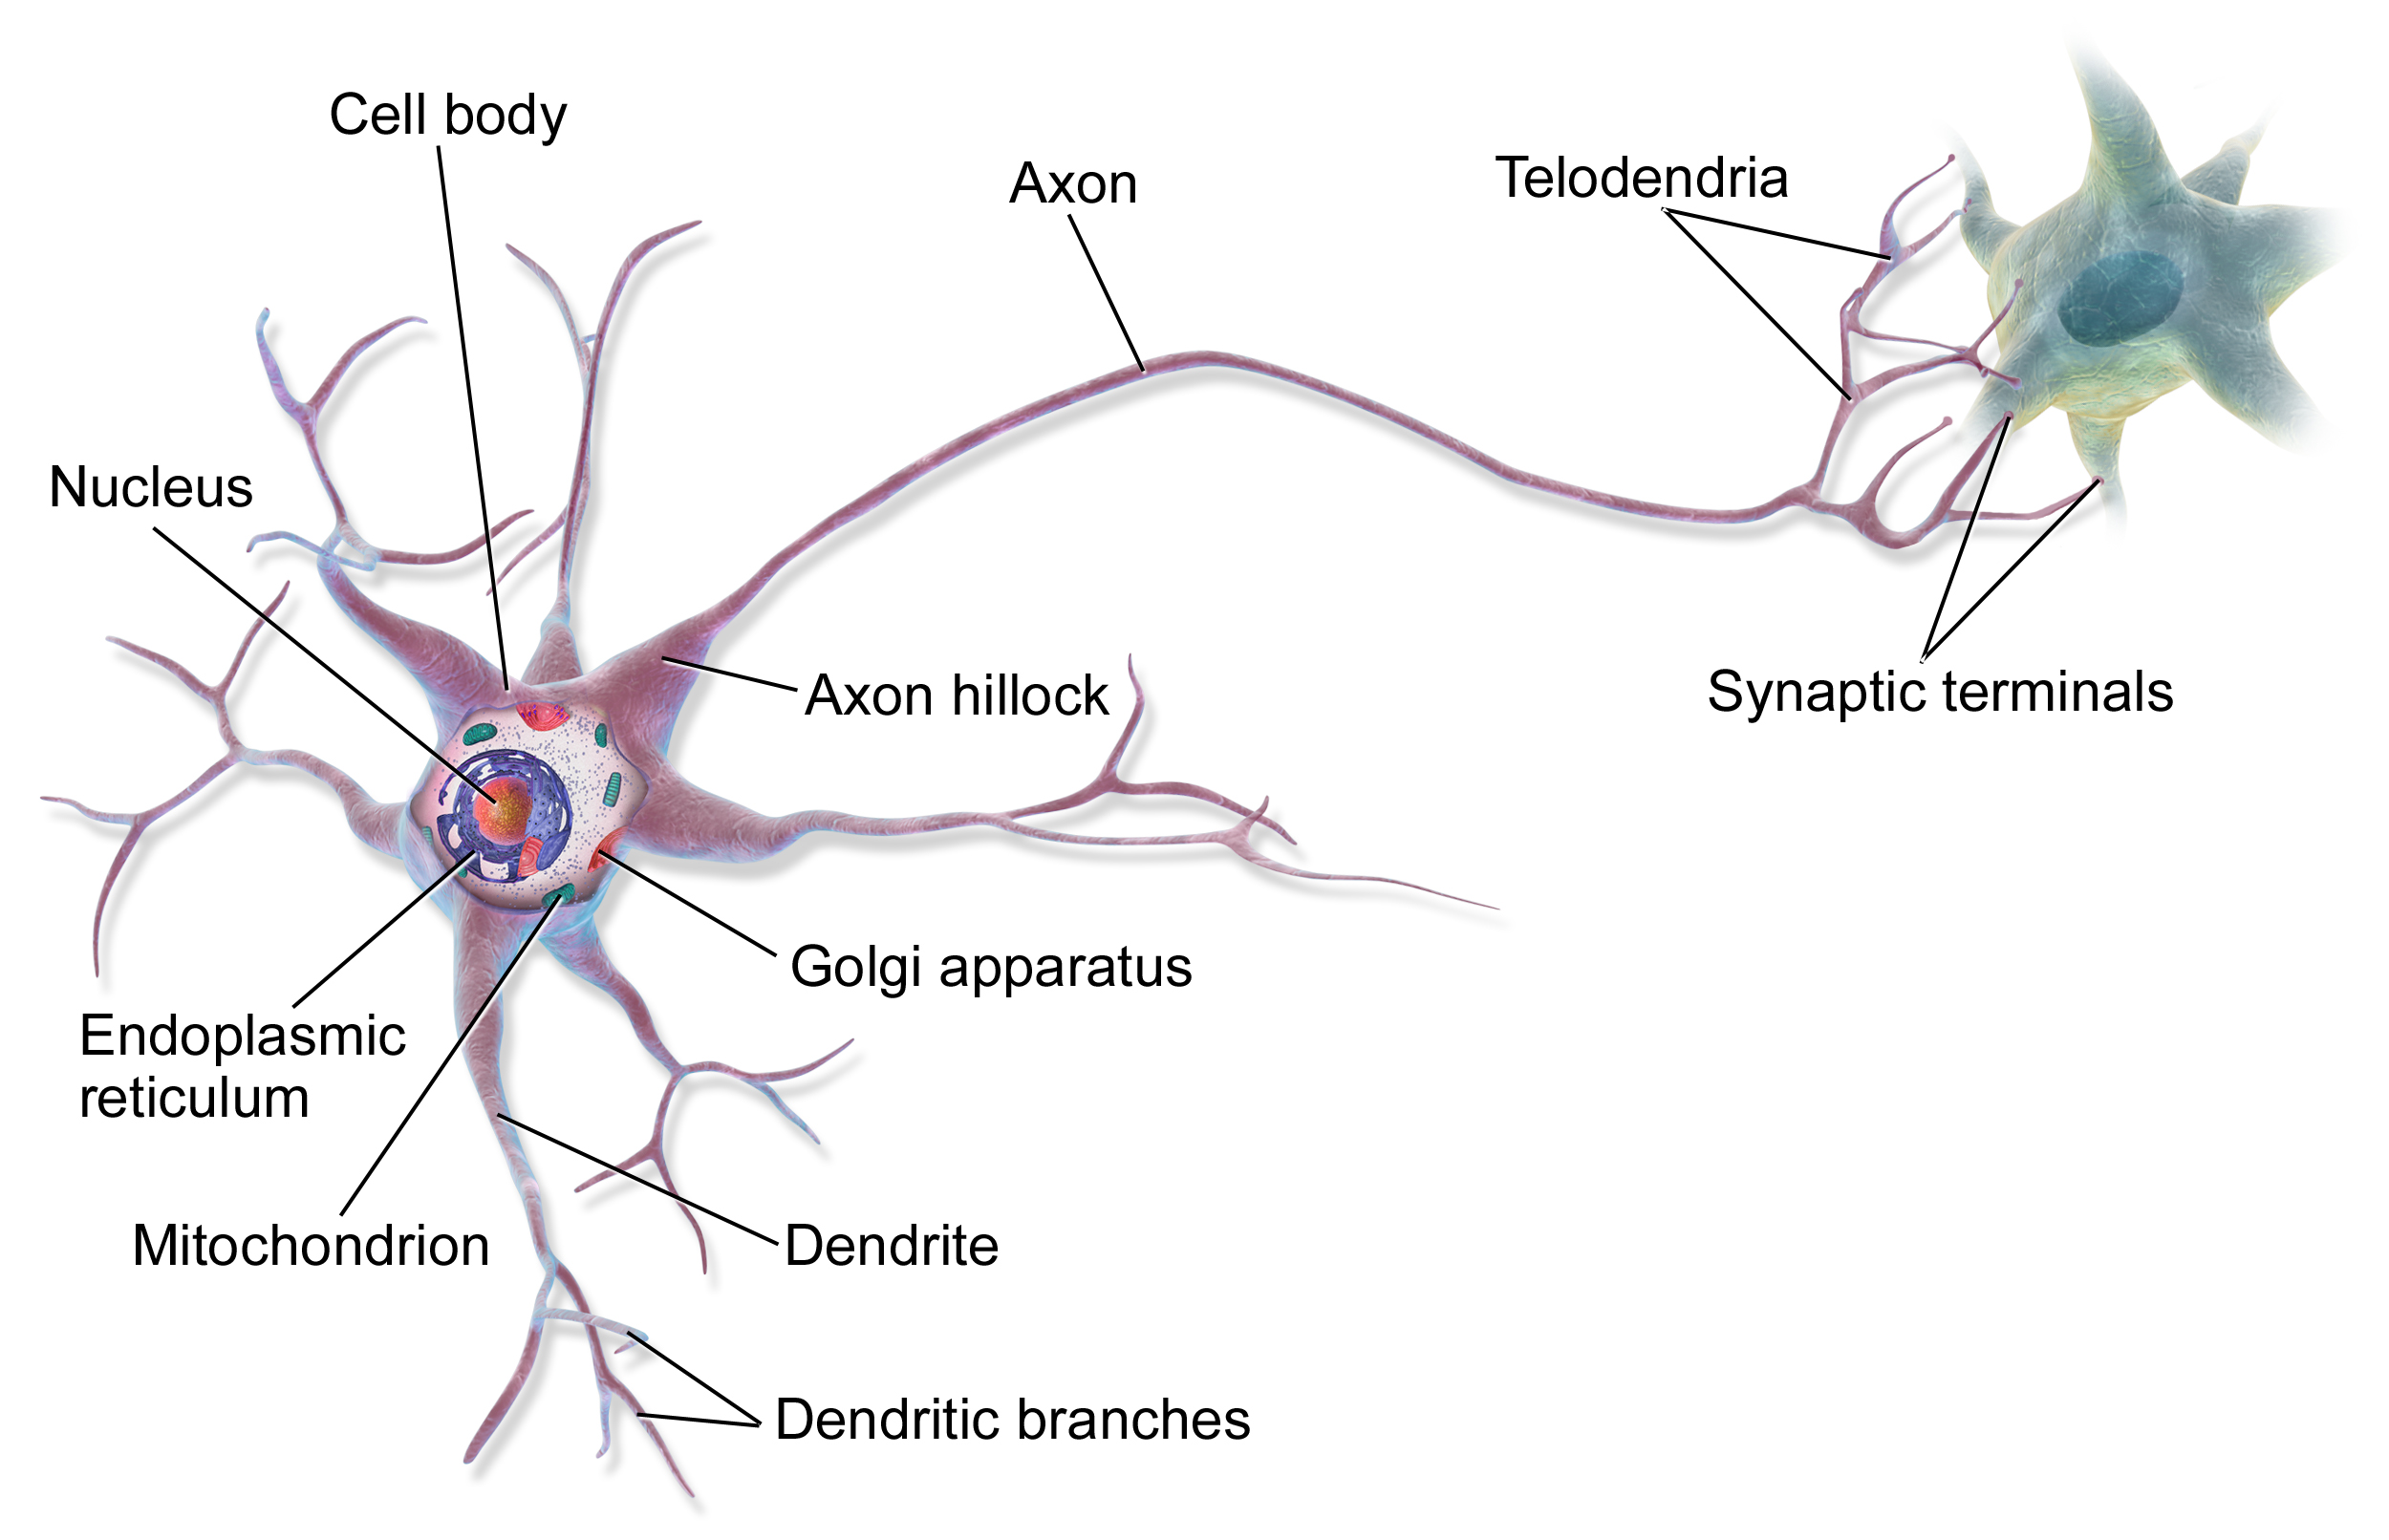

# Multiple layers in a biological neural network (Human cortex)

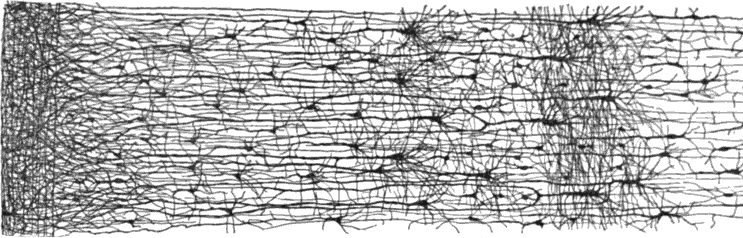

McCulloch and Pitts proposed a very simple model of the biological
neuron, which later became known as an artificial neuron: it has one or
more binary (on/off) inputs and one binary output. 

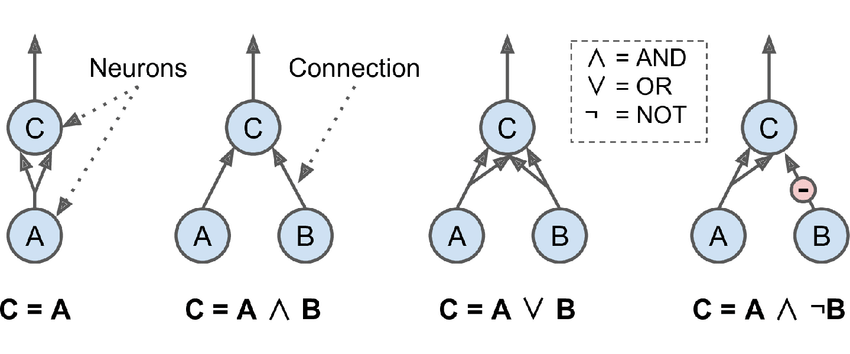

Let’s see what these networks do:

- 
The first network on the left is the identity function: if neuron A is
activated, then neuron C gets activated as well (since it receives two
input signals from neuron A); but if neuron A is off, then neuron C is
off as w
e- ll.
The second network performs a logical AND: neuron C is activated
only when both neurons A and B are activated (a single input signal is
not enough to activate neu
r- on C).
The third network performs a logical OR: neuron C gets activated if
either neuron A or neuron B is activated (
o- r both).
Finally, if we suppose that an input connection can inhibit the neuron’s
activity (which is the case with biological neurons), then the fourth
network computes a slightly more complex logical proposition: neuron
C is activated only if neuron A is active and neuron B is off. If neuron
A is active all the time, then you get a logical NOT: neuron C is active
when neuron B is off, and vice versa.


# `The Perceptron`

The perceptron is one of the simplest ANN architectures, invented in 1957
by Frank Rosenblatt. It is based on a slightly different artificial neuron called a <b>threshold logic unit (TLU)</b>, or sometimes a <b>linear
threshold unit (LTU)</b>. The inputs and output are numbers (instead of binary
on/off values), and each input connection is associated with a weight. The
TLU first computes a linear function of its inputs: z = w x1 + w x2 + … +
w xn + b = w T x + b. Then it applies a step function to the result: h (x) =
step(z). So it’s almost like logistic regression, except it uses a step function
instead of the logistic function (Chapter 4). Just like in logistic regression,
the model parameters are the input weights w and the bias term b

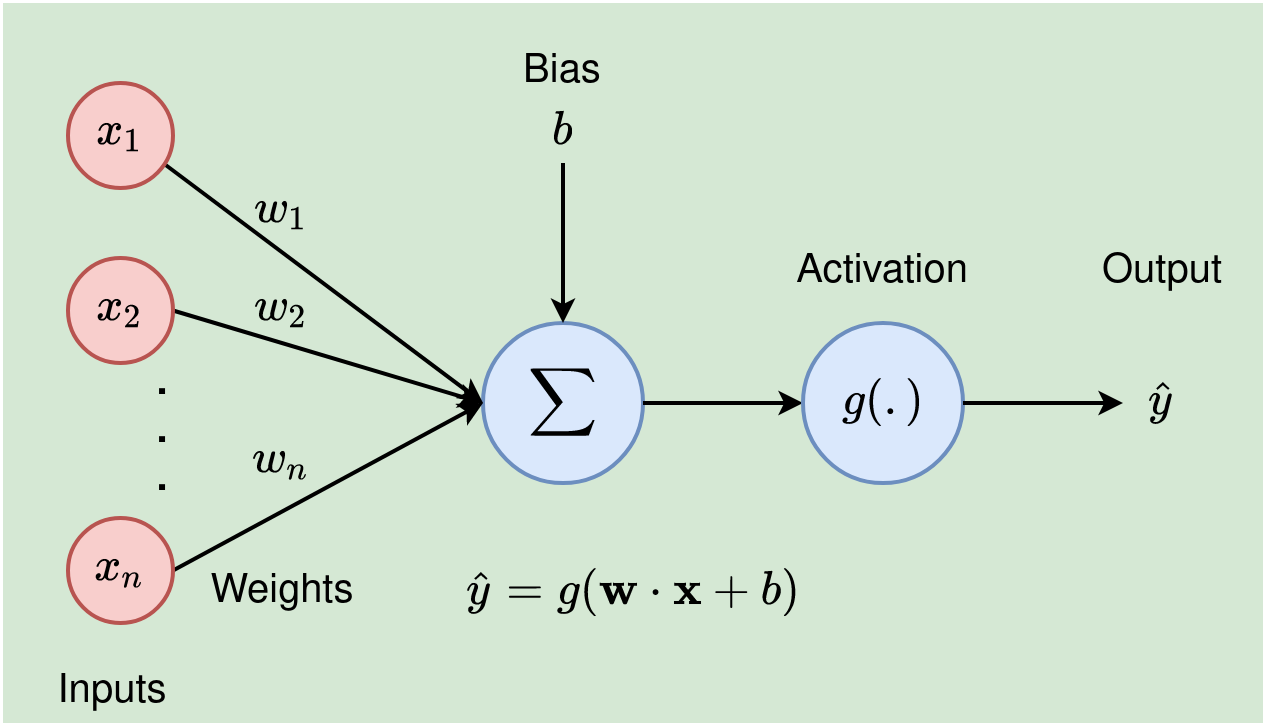

Most common step function


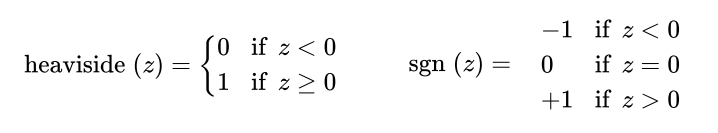

A perceptron is composed of one or more TLUs organized in a single layer,
where every TLU is connected to every input. Such a layer is called a fully
connected layer, or a dense layer. The inputs constitute the input layer. A d
since the layer of TLUs produces the final outputs, it is called the out ut
layer. For example, a perceptron with two inputs and three outputed in

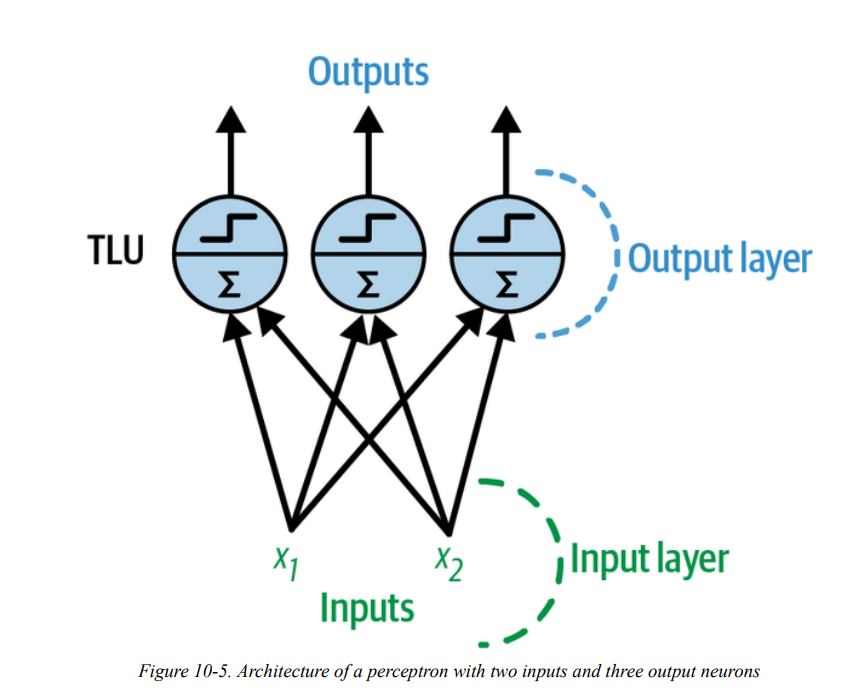

This perceptron can classify instances simultaneously into three different
binary classes, which makes it a multilabel classifier. It may also be used
for multiclass classification.

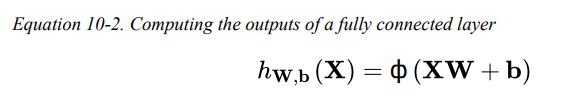

As always, X represents the matrix of input features. It has one row per 
instance and one column per feature
The weight matrix W contains all the connection weights. It has o e
row per input and one column per neurn.
The bias vector b contains all the bias terms: one per neuron.
The function ϕ is called the activation function: when the artif cial
neurons are TLUs, it is a step function shortly).


# <b>NOTE</b>
In mathematics, the sum of a matrix and a vector is undefined. However, in data science,
we allow “broadcasting”: adding a vector to a matrix means adding it to every row in
the matrix. So, XW + b first multiplies X by W—which results in a matrix with one row
per instance and one column per output—then adds the vector b to every row of that
matrix, which adds each bias term to the corresponding output, for every instance.
Moreover, ϕ is then applied itemwise to each item in the resulting matrix

# The perceptron training algorithm


Pproposed by Rosenblatt was largely inspired by Hebb’s rule. In his 1949
book The Organization of Behavior (Wiley), Donald Hebb suggested that
when a biological neuron triggers another neuron often, the connection
between these two neurons grows stronger. Siegrid Löwel later summarized
Hebb’s idea in the catchy phrase, “Cells that fire together, wire toge

the connection weight between two neurons tends to increase when
they fire simultaneousl (Hebbs rule)yher”;

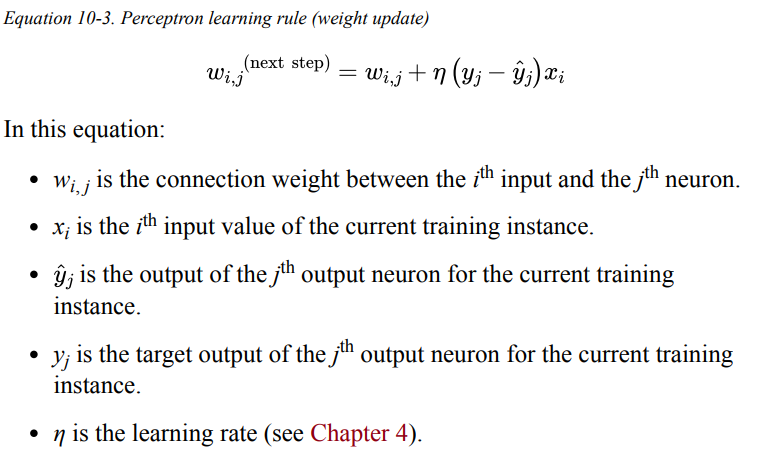

The decision boundary of each output neuron is linear, so perceptrons are
incapable of learning complex patterns (just like logistic regression
classifiers). However, if the training instances are linearly separable,
Rosenblatt demonstrated that this algorithm would converge to a solution.
This is called the <strong>`perceptron convergence theorem`</strong>

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = (iris.target == 0) # Iris setosa

In [3]:
per_clf = Perceptron (random_state=42)
per_clf.fit(X,y)

Perceptron(random_state=42)

In [4]:
X_new = [[2, 0.5], [3, 1]]
per_clf.predict(X_new) # predicts true or false for the 2 flowers in the X_new

array([ True, False])

Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier
with the following hyperparameters: loss="perceptron",
learning_rate="constant", eta0=1 (the learning rate), and
penalty=None (no regularization).

In their 1969 monograph Perceptrons, Marvin Minsky and Seymour Papert
highlighted a number of serious weaknesses of perceptrons—in particular,
the fact that they are incapable of solving some trivial problems (e.g., the
exclusive OR (XOR) classification prob

It turns out that some of the limitations of perceptrons can be eliminated by
stacking multiple perceptrons. The resulting ANN is called a multilayer
perceptron (MLP)lem

# `The Multilayer Perceptron and Backpropagation`

An MLP is composed of one input layer, one or more layers of TLUs called
hidden layers, and one final layer of TLUs called the output layer

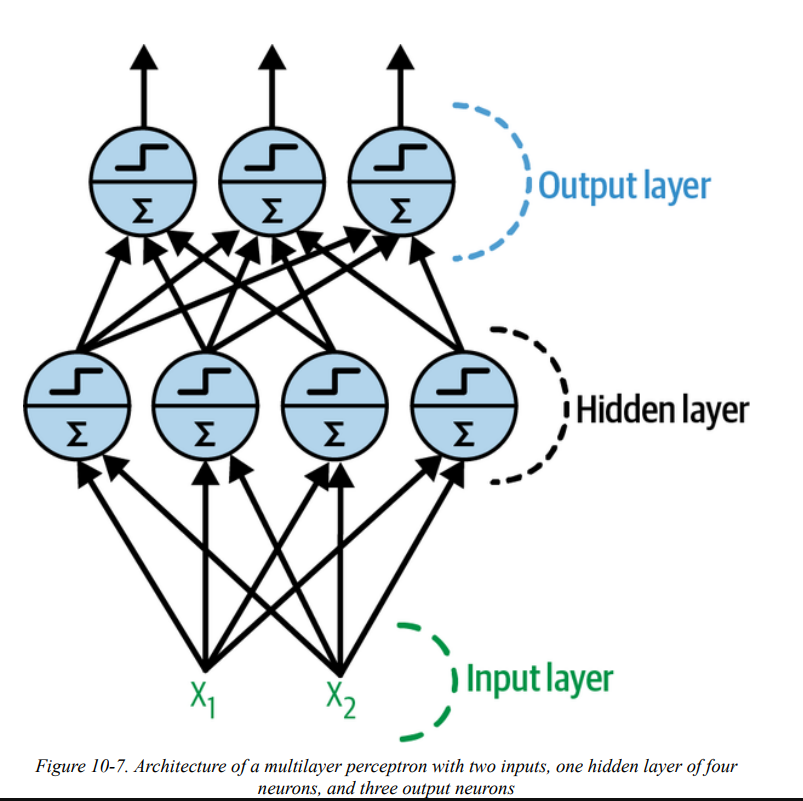

# The signal flows only in one direction (from the inputs to the outputs) ->  feedforward neural network (FNN)

#### When an ANN contains a deep stack of hidden layers, it is called a deep neural network (DNN)

In 1970, a researcher named Seppo Linnainmaa introduced in his
master’s thesis a technique to compute all the gradients automatically and
efficiently. This algorithm is now called reverse-mode automatic
differentiation (or reverse-mode autodiff for short). In just two passes
through the network (one forward, one backward), it is able to compute the
gradients of the neural network’s error with regard to every single model
par

The combination of reverse-mode autodiff
and gradient descent is now called backpropagation (or backprop for short).
ameter

in 1985, David Rumelhart, Geoffrey Hinton, and Ronald
Williams published a groundbreaking paper analyzing how
backpropagation allowed neural networks to learn useful internal
representations.

# `backpropagation`

* It handles one mini-batch at a time (for example, containing 32
instances each), and it goes through the full training set multiple times.
Each pass is called an epoch

* Each mini-batch enters the network through the input layer. The
algorithm then computes the output of all the neurons in the first
hidden layer, for every instance in the mini-batch. The result is passed
on to the next layer, its output is computed and passed to the next
layer, and so on until we get the output of the last layer, the output
layer. This is the forward pass: it is exactly like making predictions,
except all intermediate results are preserved since they are needed for
the backward pass.

* Next, the algorithm measures the network’s output error (i.e., it uses a
loss function that compares the desired output and the actual output of
the network, and returns some measure of the error).

* Then it computes how much each output bias and each connection to
the output layer contributed to the error. This is done analytically by
applying the chain rule (perhaps the most fundamental rule in
calculus), which makes this step fast and precise.

* The algorithm then measures how much of these error contributions
came from each connection in the layer below, again using the chain
rule, working backward until it reaches the input layer

* Finally, the algorithm performs a gradient descent step to tweak all the
connection weights in the network, using the error gradients it just
computed.

It is important to initialize all the hidden layers’ connection weights randomly, or else
training will fail. For example, if you initialize all weights and biases to zero, then all
neurons in a given layer will be perfectly identical, and thus backpropagation will affect
them in exactly the same way, so they will remain identical. In other words, despite
having hundreds of neurons per layer, your model will act as if it had only one neuron
per layer: it won’t be too smart. If instead you randomly initialize the weights, you
break the symmetry and allow backpropagation to train a diverse team of neurons.